# Basic task sumbission

range resolution = 0.25 
azimuth looks = 1

https://docs.canopy.umbra.space/reference/create_task

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Get first task parameters
import pystac_client
import os
import geopandas as gpd
import pandas as pd
import requests
#import xyzservices
import numpy as np

import umbra_utils

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
API = "https://api.canopy.umbra.space"
SANDBOX_API = "https://api.canopy.prod.umbra-sandbox.space"

In [4]:
aoi = gpd.read_file("../paradise.geojson")
aoi.explore(zoom_start=12, marker_type='marker')#, marker_kwds=dict(icon=folium.map.Icon(color='black')))

## Check tasking potential acquitions ("feasability")

https://docs.canopy.umbra.space/docs/feasibility

In [5]:
# Search one week into the future
# Umbra suggests at least 90min into future to allow for scheduling
now = gpd.pd.Timestamp.now().floor('s') + gpd.pd.Timedelta(minutes=90)
next_week = now + gpd.pd.Timedelta(days=7)
# Umbra API requires Z at end (UTC)
print(now.isoformat()+'Z', next_week.isoformat()+'Z')

2024-10-25T18:00:08Z 2024-11-01T18:00:08Z


In [6]:
acquisition = umbra_utils.acquisition_025_1
acquisition

{'rangeResolutionMinMeters': 0.25,
 'multilookFactor': 1,
 'grazingAngleMinDegrees': 53,
 'grazingAngleMaxDegrees': 59}

In [7]:
url = f"{API}/tasking/feasibilities"
tasking_params = {
    "imagingMode": "SPOTLIGHT",
    "spotlightConstraints": {
        "geometry": aoi.geometry[0].__geo_interface__,
        "polarization": "VV",
        "targetAzimuthAngleStartDegrees": 0,
        "targetAzimuthAngleEndDegrees": 360,
        "sceneSize": "5x5_KM"
    },
    "windowStartAt": now.isoformat()+'Z',
    "windowEndAt": next_week.isoformat()+'Z',
}

# Add acquitision constraints
tasking_params['spotlightConstraints'].update(acquisition)
print(tasking_params) 

headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "authorization": f"Bearer {os.environ.get('UMBRA_API_TOKEN')}"
}

response = requests.post(url, json=tasking_params, headers=headers)

{'imagingMode': 'SPOTLIGHT', 'spotlightConstraints': {'geometry': {'type': 'Point', 'coordinates': (-121.74456, 46.79679, 1589.0)}, 'polarization': 'VV', 'targetAzimuthAngleStartDegrees': 0, 'targetAzimuthAngleEndDegrees': 360, 'sceneSize': '5x5_KM', 'rangeResolutionMinMeters': 0.25, 'multilookFactor': 1, 'grazingAngleMinDegrees': 53, 'grazingAngleMaxDegrees': 59}, 'windowStartAt': '2024-10-25T18:00:08Z', 'windowEndAt': '2024-11-01T18:00:08Z'}


In [9]:
# Retrieve feasibilities (wait 10sec before running)

url = f"{API}/tasking/feasibilities/{response.json()['id']}"

response = requests.get(url, headers=headers)

df = pd.DataFrame(response.json()['opportunities'])
df

,windowStartAt,windowEndAt,durationSec,grazingAngleStartDegrees,grazingAngleEndDegrees,targetAzimuthAngleStartDegrees,targetAzimuthAngleEndDegrees,squintAngleStartDegrees,squintAngleEndDegrees,squintAngleEngineeringDegreesStart,squintAngleEngineeringDegreesEnd,slantRangeStartKm,slantRangeEndKm,groundRangeStartKm,groundRangeEndKm,satelliteId
0,2024-10-26T05:00:04+00:00,2024-10-26T05:10:56+00:00,52.0,53.164252,53.275489,227.548365,291.035336,31.751824,-31.346844,58.248176,121.346844,634.448127,633.321240,352.987923,349.809056,Umbra-05
1,2024-10-26T18:02:19+00:00,2024-10-26T18:12:31+00:00,12.0,55.950105,58.938581,316.581051,301.794544,149.332363,164.176578,-59.332363,-74.176578,619.967251,601.836052,319.726029,286.201228,Umbra-05
2,2024-10-26T18:02:53+00:00,2024-10-26T18:13:13+00:00,20.0,58.947086,53.282126,270.241741,247.514307,-164.167098,-141.348136,-105.832902,-128.651864,602.034046,639.172054,287.090123,353.953139,Umbra-05
3,2024-10-27T18:56:02+00:00,2024-10-27T19:07:08+00:00,66.0,53.201857,53.183054,64.966692,136.802126,35.613280,-35.724423,54.386720,125.724423,717.317532,718.017512,392.852768,395.454034,Umbra-10
4,2024-10-28T04:28:46+00:00,2024-10-28T04:39:44+00:00,58.0,53.053762,53.051420,109.598321,38.200871,144.152365,-144.180455,-54.152365,-125.819545,635.063725,634.754082,353.722924,351.713481,Umbra-05
5,2024-10-28T05:47:44+00:00,2024-10-28T05:58:31+00:00,47.0,53.189485,53.042560,96.994235,47.730387,155.555250,-154.977047,-65.555250,-115.022953,717.651287,718.465656,394.154125,394.470079,Umbra-10
6,2024-10-28T06:08:50+00:00,2024-10-28T06:19:35+00:00,45.0,53.153874,53.197723,231.683563,287.112062,27.664751,-27.426043,62.335249,117.426043,620.801199,620.057867,345.961799,343.781353,Umbra-08
7,2024-10-28T17:30:55+00:00,2024-10-28T17:41:43+00:00,48.0,53.032179,53.196144,71.452261,128.804091,28.753112,-28.237129,61.246888,118.237129,639.893289,639.213932,355.323275,355.090889,Umbra-05
8,2024-10-28T19:09:38+00:00,2024-10-28T19:19:50+00:00,12.0,58.879868,54.162003,253.775923,241.231874,-147.991752,-135.391088,-122.008248,-134.608912,585.281337,614.778119,280.695836,334.277168,Umbra-08
9,2024-10-29T05:52:28+00:00,2024-10-29T06:02:40+00:00,12.0,54.793326,58.939640,117.636956,106.771895,135.738982,146.658971,-45.738982,-56.658971,704.966275,675.978980,373.144526,319.967427,Umbra-10


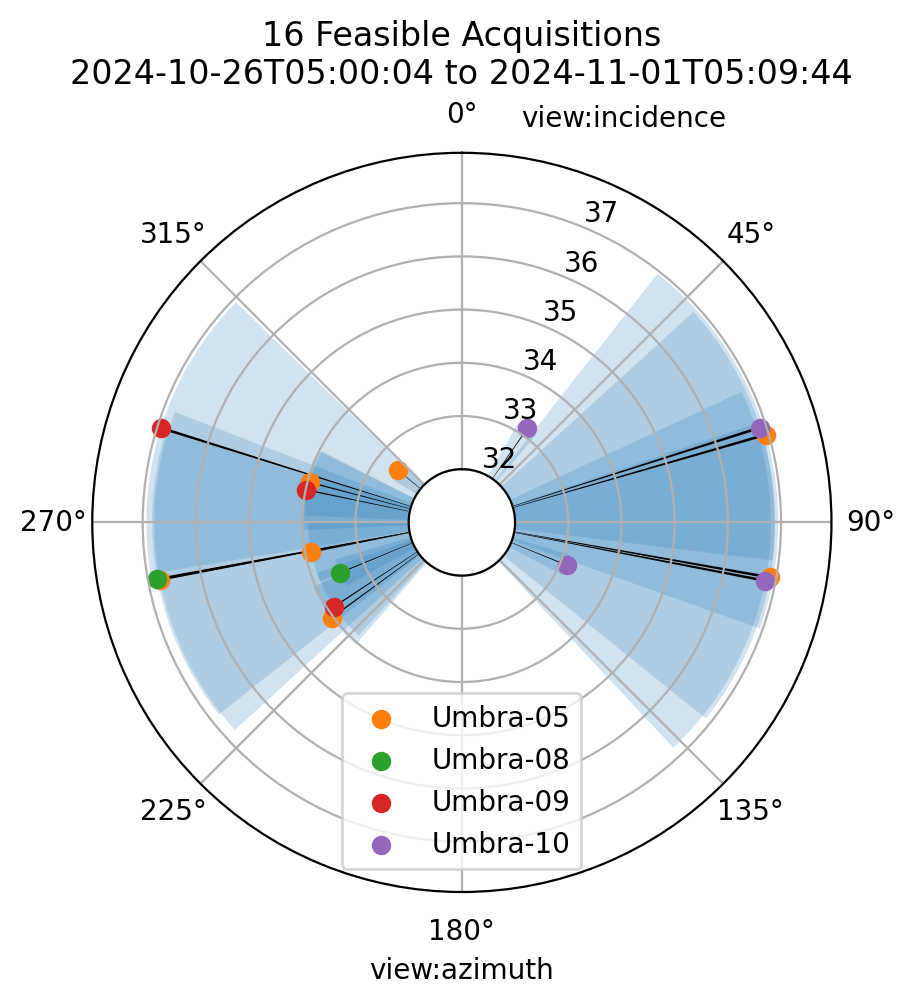

In [10]:
ax = umbra_utils.plot_feasibilities_polar(df, satnames=True, incidence_range='auto')

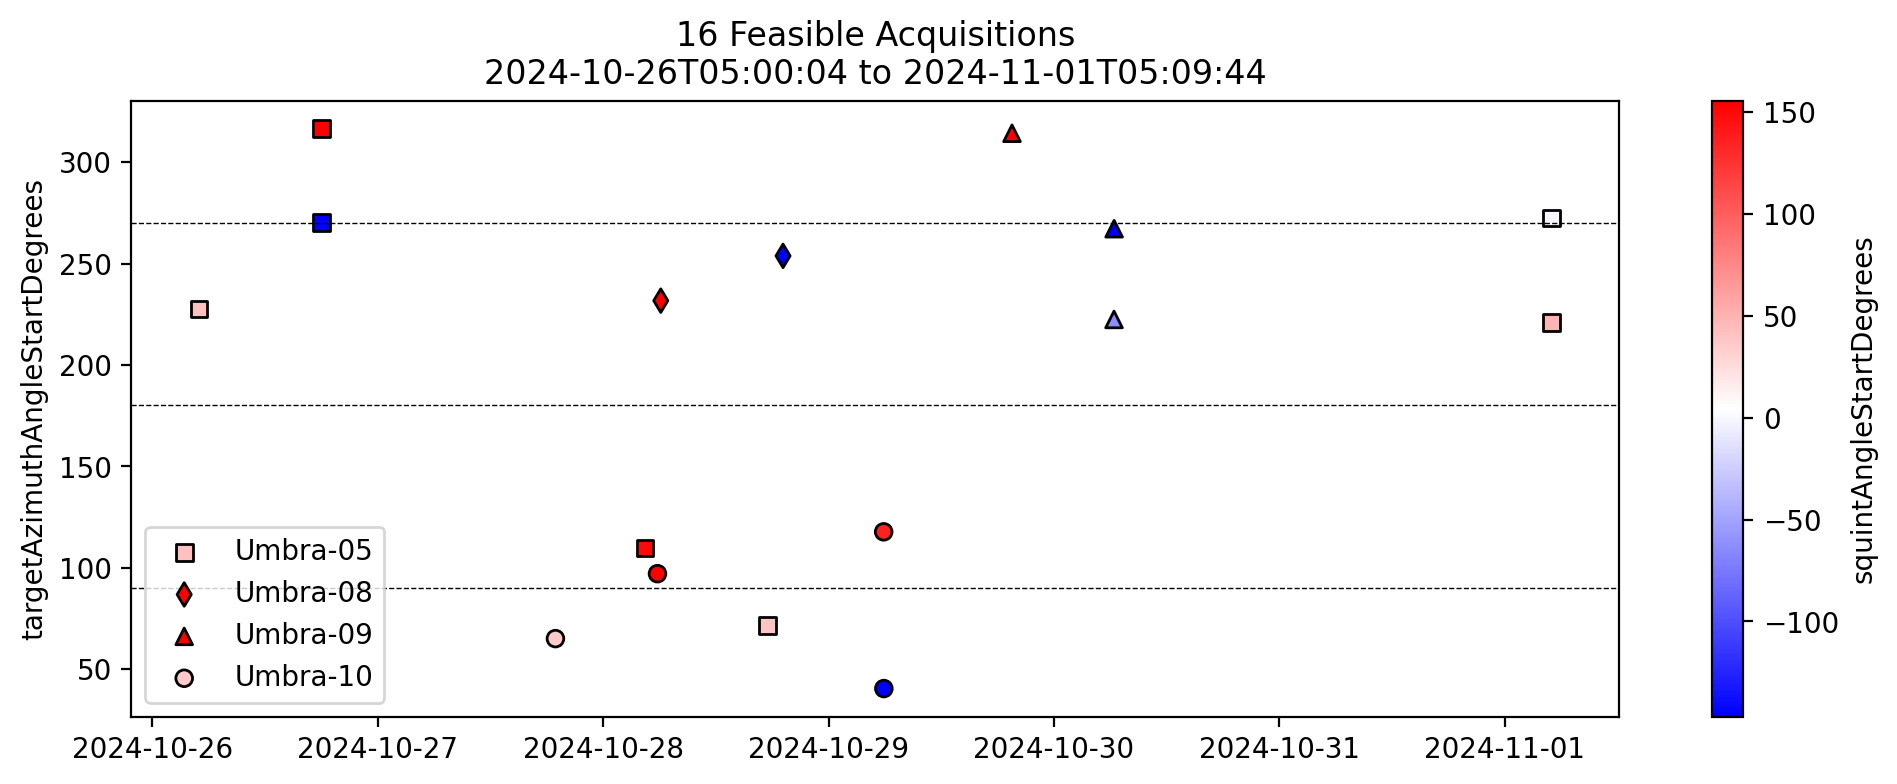

In [11]:
ax = umbra_utils.plot_feasibilities_timeseries(df)

In [12]:
# Pick next Umbra-10 acquisition
mypick = df[df.satelliteId == 'Umbra-10'].iloc[0]
mypick

windowStartAt                         2024-10-27T18:56:02+00:00
windowEndAt                           2024-10-27T19:07:08+00:00
durationSec                                                66.0
grazingAngleStartDegrees                              53.201857
grazingAngleEndDegrees                                53.183054
targetAzimuthAngleStartDegrees                        64.966692
targetAzimuthAngleEndDegrees                         136.802126
squintAngleStartDegrees                                35.61328
squintAngleEndDegrees                                -35.724423
squintAngleEngineeringDegreesStart                     54.38672
squintAngleEngineeringDegreesEnd                     125.724423
slantRangeStartKm                                    717.317532
slantRangeEndKm                                      718.017512
groundRangeStartKm                                   392.852768
groundRangeEndKm                                     395.454034
satelliteId                             

In [14]:
# Tighten tasking_params based on our pick
azimuth_tolerance = 20

# Plus or minus 1 hour around our pick
start = pd.to_datetime(mypick['windowStartAt']).tz_localize(None)
end = pd.to_datetime(mypick['windowEndAt']).tz_localize(None)
window_start = start - gpd.pd.Timedelta(hours=1)
window_end = end + gpd.pd.Timedelta(hours=1)

myconstraints = {
  'polarization': 'VV', 
  'targetAzimuthAngleStartDegrees': int(mypick.targetAzimuthAngleStartDegrees - azimuth_tolerance),
  'targetAzimuthAngleEndDegrees': int(mypick.targetAzimuthAngleEndDegrees + azimuth_tolerance),
}

tasking_params['spotlightConstraints'].update(myconstraints)

tasking_params.update({
    'satelliteIds': [mypick.satelliteId],
    'windowStartAt': window_start.isoformat()+'Z',
    'windowEndAt': window_end.isoformat()+'Z',
    "tags": ["paradise","uw"],
    "taskName": "paradise3",
    "userOrderId": "UW"

})
tasking_params

{'imagingMode': 'SPOTLIGHT',
 'spotlightConstraints': {'geometry': {'type': 'Point',
   'coordinates': (-121.74456, 46.79679, 1589.0)},
  'polarization': 'VV',
  'targetAzimuthAngleStartDegrees': 44,
  'targetAzimuthAngleEndDegrees': 156,
  'sceneSize': '5x5_KM',
  'rangeResolutionMinMeters': 0.25,
  'multilookFactor': 1,
  'grazingAngleMinDegrees': 53,
  'grazingAngleMaxDegrees': 59},
 'windowStartAt': '2024-10-27T17:56:02Z',
 'windowEndAt': '2024-10-27T20:07:08Z',
 'satelliteIds': ['Umbra-10'],
 'tags': ['paradise', 'uw'],
 'taskName': 'paradise3',
 'userOrderId': 'UW'}

## Actually submit task!

In [15]:
# NOTE: need different API key for sanbox mode?
url = f"{API}/tasking/tasks"
response = requests.post(url, json=tasking_params, headers=headers)
print(response.text)

{"id":"78ebf911-dfd6-4327-9f69-0db9b4631acb","type":"Feature","geometry":{"type":"Point","coordinates":[-121.74456,46.79679,1589.0]},"properties":{"imagingMode":"SPOTLIGHT","spotlightConstraints":{"geometry":{"type":"Point","coordinates":[-121.74456,46.79679,1589.0]},"polarization":"VV","rangeResolutionMinMeters":0.25,"multilookFactor":1,"grazingAngleMinDegrees":53,"grazingAngleMaxDegrees":59,"targetAzimuthAngleStartDegrees":44,"targetAzimuthAngleEndDegrees":156,"sceneSize":"5x5_KM"},"windowStartAt":"2024-10-27T17:56:02+00:00","windowEndAt":"2024-10-27T20:07:08+00:00","deliveryConfigId":null,"productTypes":["GEC","SIDD","SICD","CPHD"],"tags":["paradise","uw"],"taskName":"paradise3","userOrderId":"UW","satelliteIds":["Umbra-10"],"id":"78ebf911-dfd6-4327-9f69-0db9b4631acb","createdAt":"2024-10-25T14:32:12.687942+00:00","updatedAt":"2024-10-25T14:32:12.687946+00:00","organizationId":"org_Eukdrsr1pe3dXZrR","status":"SUBMITTED","statusHistory":[{"status":"RECEIVED","timestamp":"2024-10-25T1